## Введение в нейронные сети
### Урок 1. Основы обучения нейронных сетей

Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ:
- Что приводит к ухудшению точности нейронной сети?
- Что приводит к увеличению её точности?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

(1797, 64)


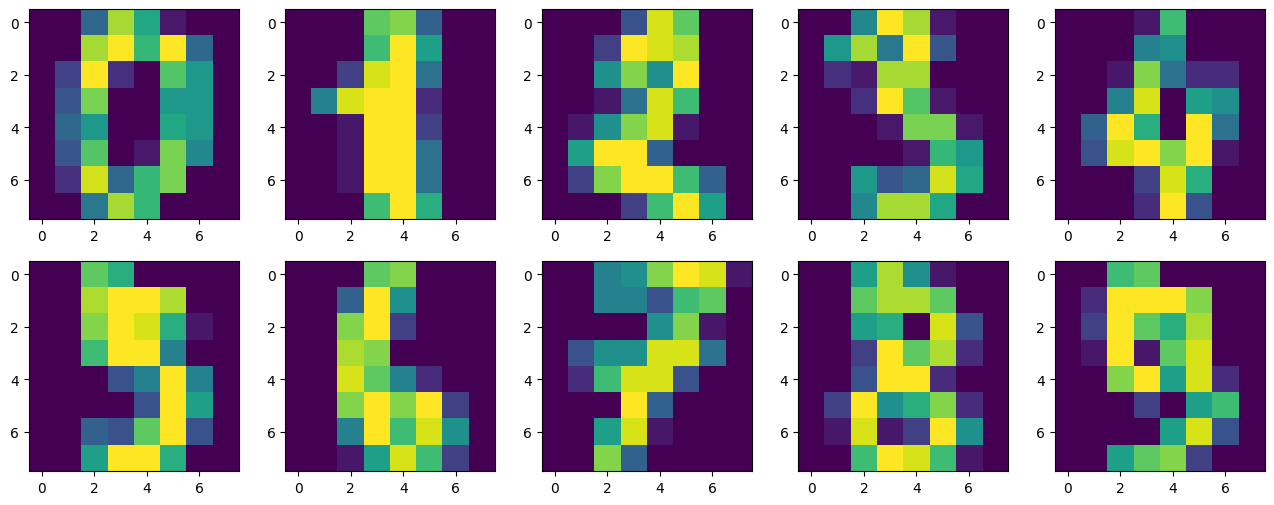

In [3]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [4]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [5]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [6]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [7]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 20

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    # sigmoid_deriv - Для классификации
    # relu_deriv - Для регрессии
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

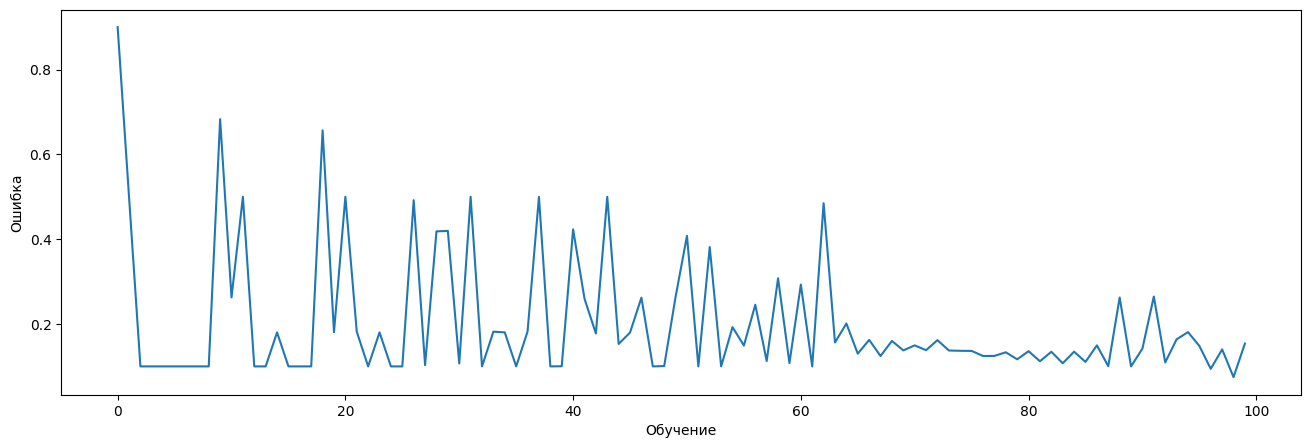

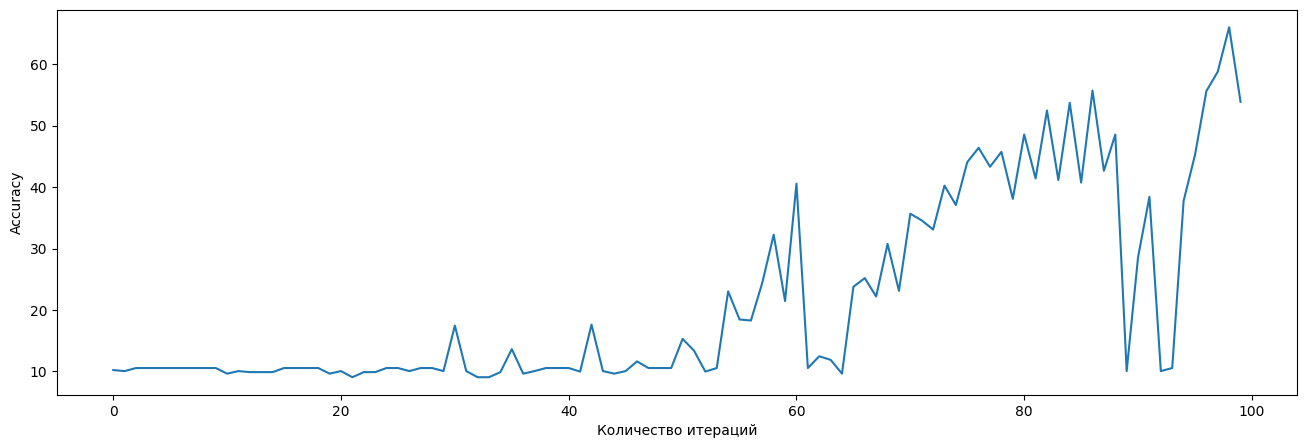

In [8]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

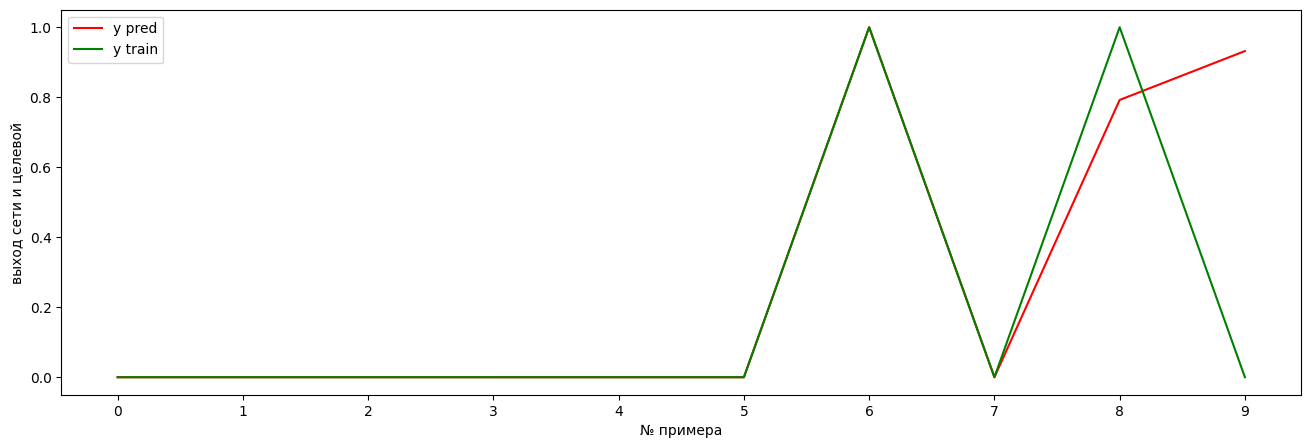

accuracy на обучении 53.87%


In [9]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

Для удобства обернем обучение в функцию

In [14]:
def nn_train(X_train, y_train, *, neuron_numb = 20, learning_rate = 0.1, num_epochs = 100):

    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов
        
    # массив для ошибок, чтобы потом построить график
    errors = []
    metrics = []
    
    # процесс обучения
    for i in range(num_epochs):
    
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
    
        # обратное распространение (back propagation)
        # с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_grad.dot(w1.T)
        # sigmoid_deriv - Для классификации
        # relu_deriv - Для регрессии
        layer1_grad = layer1_error * sigmoid_deriv(layer1)
        
        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate
        
        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        
        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
    
    return metrics, errors

In [15]:
# Проверим что присходит при изменении параметра neuron_numb
res_error = {}
res_metrics = {}
for i in range(10, 60):
    errors, metrics = nn_train(X_train, y_train, neuron_numb=i)
    res_error[i] = max(errors)
    res_metrics[i] = max(metrics)

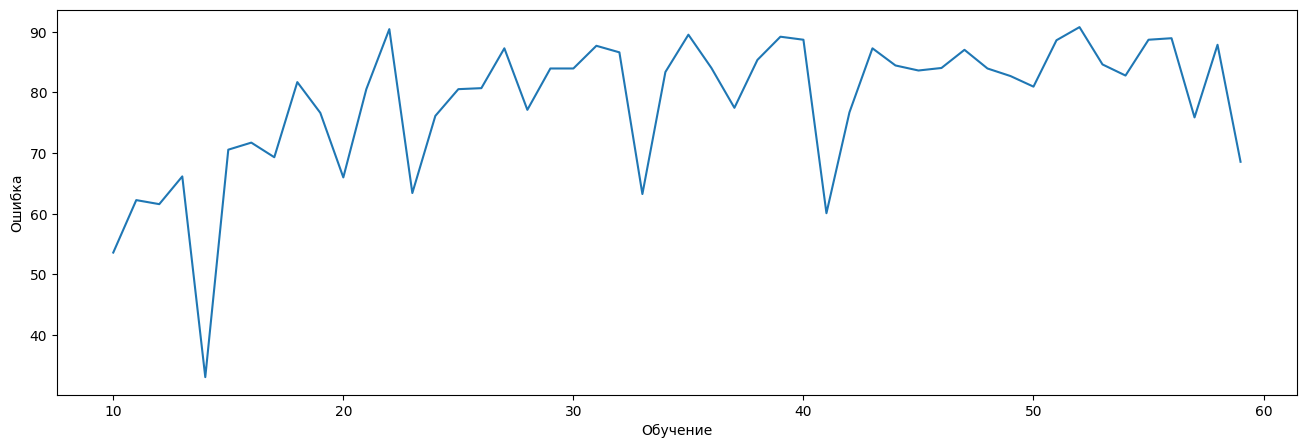

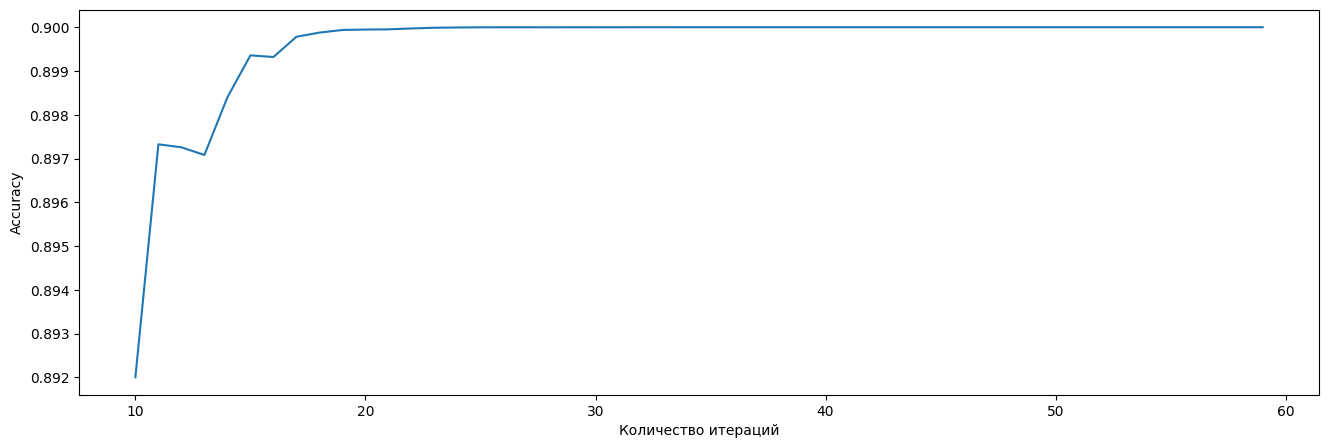

In [26]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_error.keys(), res_error.values())
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_metrics.keys(), res_metrics.values() )
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [35]:
print('BEST neuron_numb: ', max(res_metrics, key=res_metrics.get))
print('MIN err neuron_numb: ', min(res_error, key=res_error.get))

BEST neuron_numb:  58
MIN err neuron_numb:  14


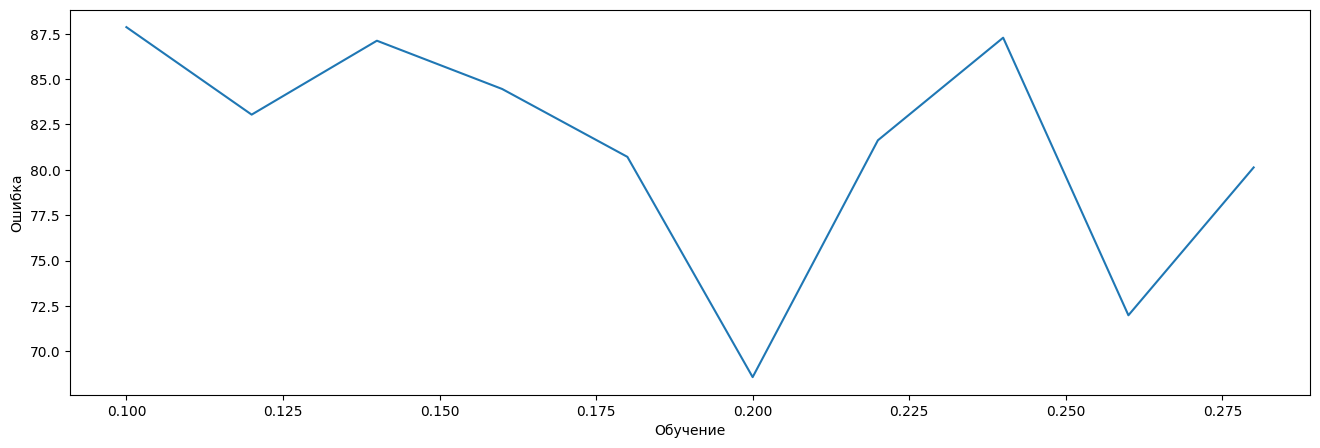

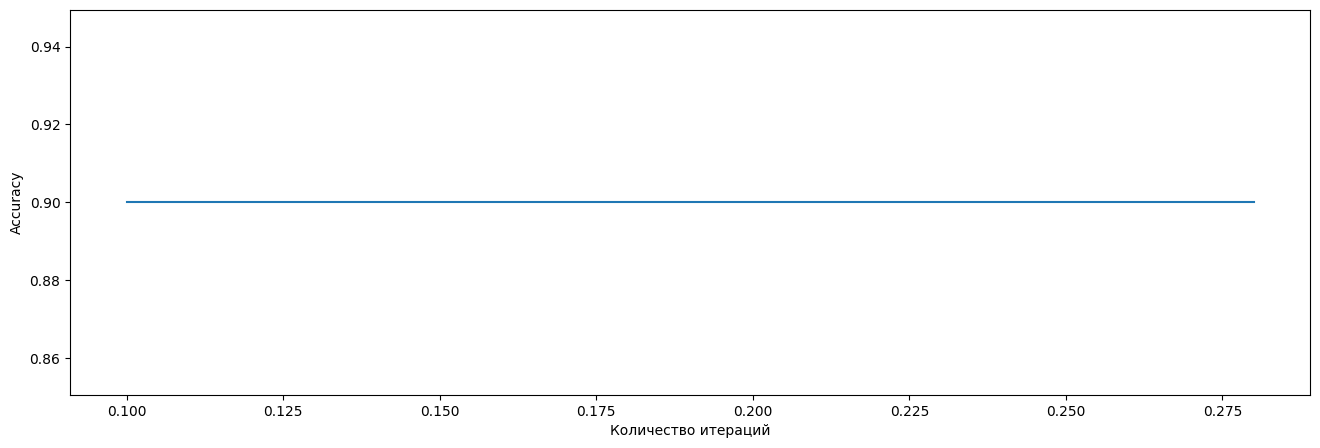

BEST neuron_numb:  0.1
MIN err neuron_numb:  0.2


In [40]:
# Проверим что присходит при изменении параметра learning_rate
res_error = {}
res_metrics = {}
for i in range(10, 30, 2):
    errors, metrics = nn_train(X_train, y_train, neuron_numb=58, learning_rate=i/100)
    res_error[i/100] = max(errors)
    res_metrics[i/100] = max(metrics)

# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_error.keys(), res_error.values())
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_metrics.keys(), res_metrics.values() )
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()    

print('BEST neuron_numb: ', max(res_metrics, key=res_metrics.get))
print('MIN err neuron_numb: ', min(res_error, key=res_error.get))

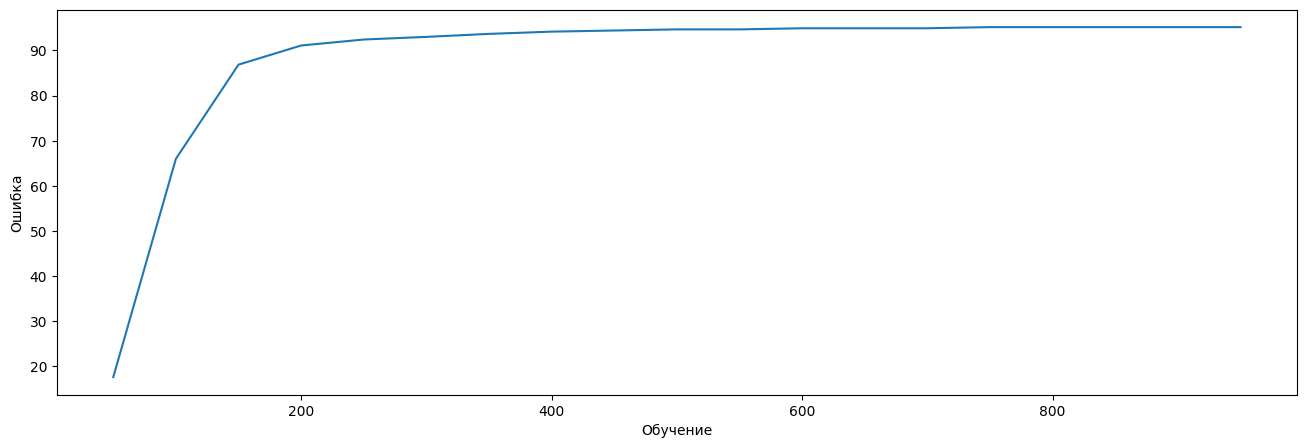

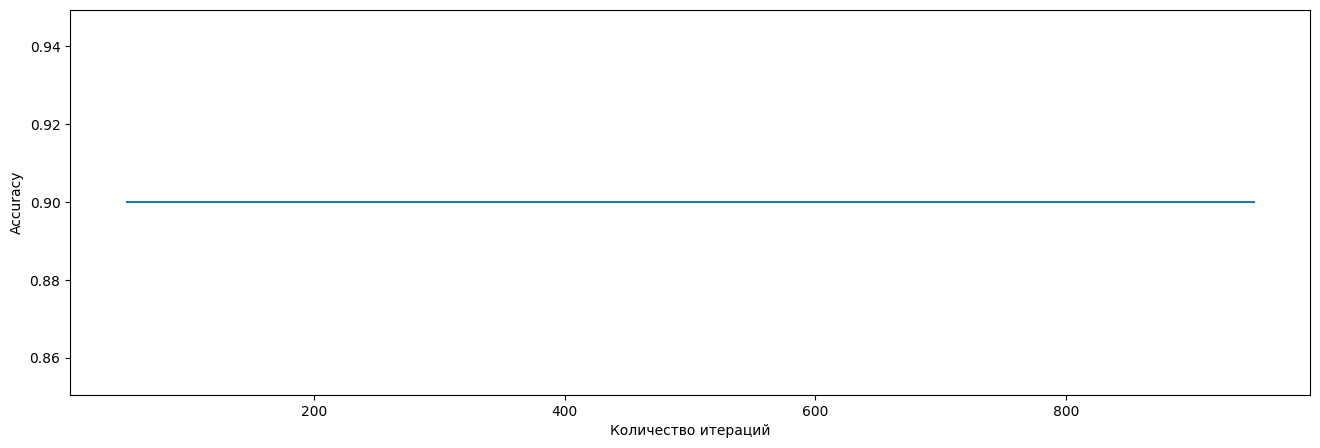

BEST num_epochs:  50
MIN err num_epochs:  50


In [44]:
# Проверим что присходит при изменении параметра num_epochs
res_error = {}
res_metrics = {}
for i in range(50, 1000, 50):
    errors, metrics = nn_train(X_train, y_train, num_epochs=i)
    res_error[i] = max(errors)
    res_metrics[i] = max(metrics)

# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(res_error.keys(), res_error.values())
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(res_metrics.keys(), res_metrics.values() )
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()    

print('BEST num_epochs: ', max(res_metrics, key=res_metrics.get))
print('MIN err num_epochs: ', min(res_error, key=res_error.get))

In [55]:
neuron_numb = 58
learning_rate = 0.2
num_epochs = 400

np.random.seed(0)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов


# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

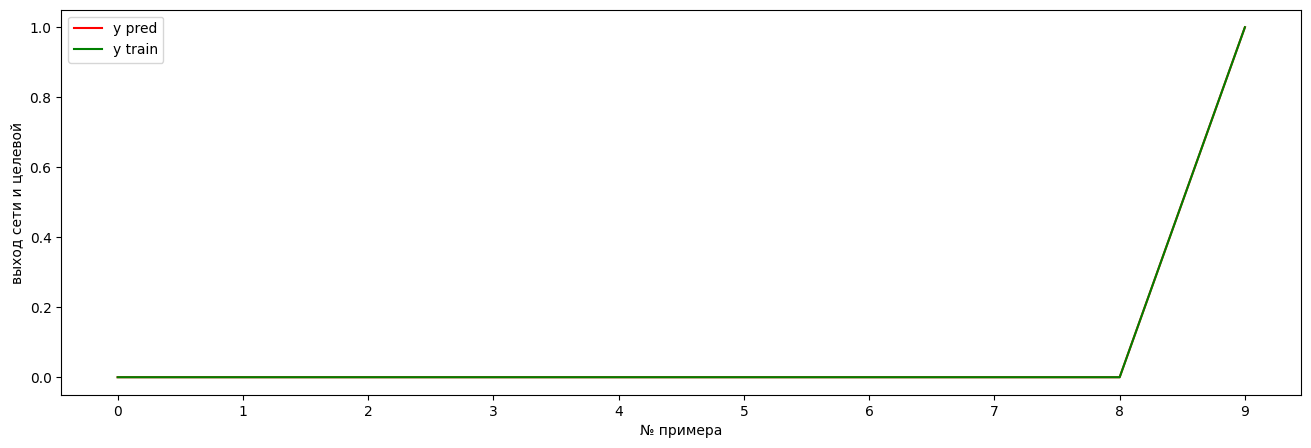

accuracy на обучении 95.76%


In [56]:
N = 10
label = 1
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

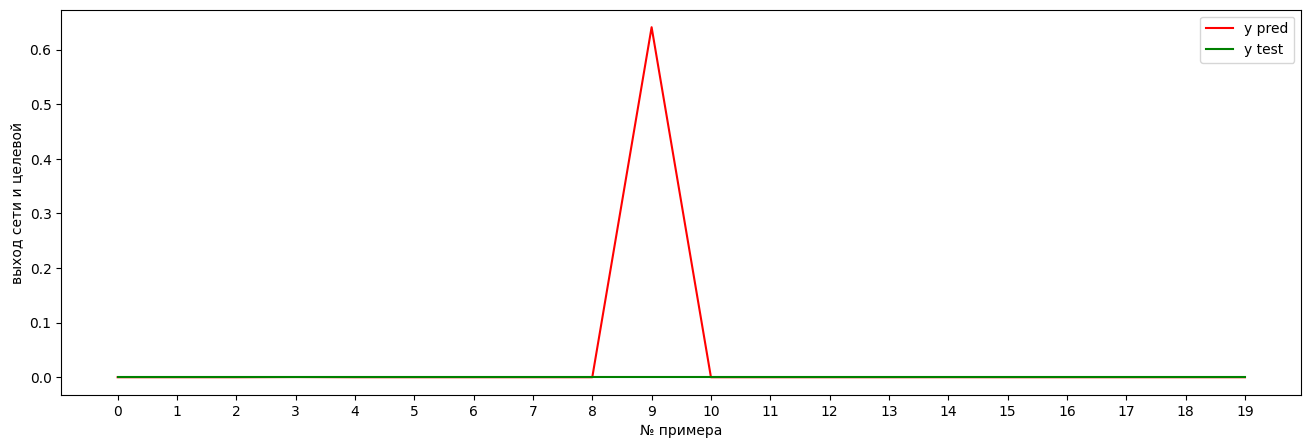

accuracy на тесте 90.24%


In [57]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

Путём увеличения количество нейронов скрытого слоя и количества эпох, удалось улушчить качество модели
В ходе домашней работы можно сделать следующие выводы:
Выводы: 
1. При увеличении числа нейронов скрытого слоя качество возрастает.
2. При увеличении скорости обучения качество ухудшается.
3. При увеличении количества итераций качество возрастает.